### Problem Statement
There is hiring.csv. This file contains hiring statics for a firm such as experience of candidate, his written test score and personal interview score. Based on these 3 factors, HR will decide the salary. Given this data, you need to build a machine learning model for HR department that can help them decide salaries for future candidates. Using this predict salaries for following candidates,

<b>2 yr experience, 9 test score, 6 interview score

<b>12 yr experience, 10 test score, 10 interview score

In [17]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from word2number import w2n
import matplotlib.pyplot as plt

In [15]:
df = pd.read_csv('hiring.csv')
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [16]:
df[['experience','test_score(out of 10)','interview_score(out of 10)']]
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,NaN,8.0,9,50000
1,NaN,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [3]:
df.experience = df.experience.fillna("zero")
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,zero,8.0,9,50000
1,zero,8.0,6,45000
2,five,6.0,7,60000
3,two,10.0,10,65000
4,seven,9.0,6,70000
5,three,7.0,10,62000
6,ten,NaN,7,72000
7,eleven,7.0,8,80000


In [4]:
df.experience = df.experience.apply(w2n.word_to_num)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,NaN,7,72000
7,11,7.0,8,80000


In [5]:
df['test_score(out of 10)'].mean()

7.857142857142857

In [6]:
import math
test_score_mean_floor =math.floor(df['test_score(out of 10)'].mean())
test_score_mean_floor

7

In [7]:
df['test_score(out of 10)'] = df['test_score(out of 10)'].fillna(test_score_mean_floor)
df

,experience,test_score(out of 10),interview_score(out of 10),salary($)
0,0,8.0,9,50000
1,0,8.0,6,45000
2,5,6.0,7,60000
3,2,10.0,10,65000
4,7,9.0,6,70000
5,3,7.0,10,62000
6,10,7.0,7,72000
7,11,7.0,8,80000


In [53]:
salary = df["salary($)"]
interview =df["interview_score(out of 10)"]
test =df["test_score(out of 10)"]


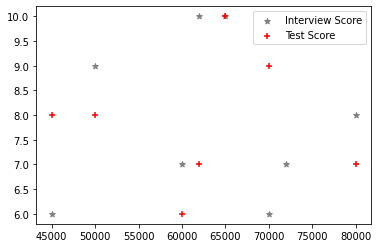

In [52]:
%matplotlib inline
plt.scatter(salary, interview, label="Interview Score" ,color='grey',marker='*')
plt.scatter(salary,test , label="Test Score",color='red',marker='+')
plt.legend()

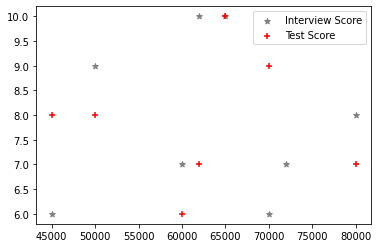

In [54]:
%matplotlib inline
plt.scatter(df["salary($)"], df["interview_score(out of 10)"], label="Interview Score" ,color='grey',marker='*')
plt.scatter(df["salary($)"],df["test_score(out of 10)"] , label="Test Score",color='red',marker='+')
plt.legend()

In [8]:
X = df.drop('salary($)',axis='columns')
X.head()

,experience,test_score(out of 10),interview_score(out of 10)
0,0,8.0,9
1,0,8.0,6
2,5,6.0,7
3,2,10.0,10
4,7,9.0,6


In [9]:
y=df["salary($)"]
y

0    50000
1    45000
2    60000
3    65000
4    70000
5    62000
6    72000
7    80000
Name: salary($), dtype: int64

In [10]:
reg= linear_model.LinearRegression()
reg

LinearRegression()

In [11]:
#Approch 1:
reg.fit(X.values,y.values)
#Approch 2:
#reg.fit(df[['experience','test_score(out of 10)','interview_score(out of 10)']],df['salary($)'])

LinearRegression()

In [12]:
reg.predict([[2,9,6]])

array([53713.86677124])

In [13]:
reg.predict([[12,10,10]])

array([93747.79628651])

In [55]:
reg.predict([[7,6,5]])

array([59513.80198121])